# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),'C:/Users/pacov/Documents/flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:/Users/pacov/Documents/flores\
C:/Users/pacov/Documents/flores\anturiohd 1
C:/Users/pacov/Documents/flores\girasol 4986
C:/Users/pacov/Documents/flores\malamadrehd 9896
C:/Users/pacov/Documents/flores\rosa 5032
C:/Users/pacov/Documents/flores\savila 8757
Directorios leidos: 5
Imagenes en cada directorio [4987, 9896, 5032, 8757, 6758]
suma Total de imagenes en subdirs: 35430


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  35430


In [5]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 anturiohd
1 girasol
2 malamadrehd
3 rosa
4 savila


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (28344, 30, 30, 3) (28344,)
Testing data shape :  (7086, 30, 30, 3) (7086,)


Text(0.5, 1.0, 'Ground Truth : 1')

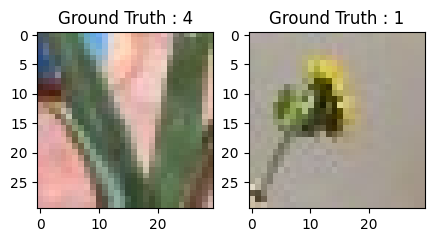

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

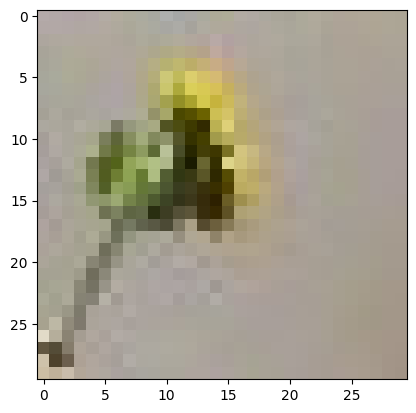

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(22675, 30, 30, 3) (5669, 30, 30, 3) (22675, 5) (5669, 5)


# Creamos el modelo de CNN

In [104]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 5e-4 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 40 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [105]:
flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(30,30,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))


flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [106]:
flower_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 7200)              0         
                                                                 
 dense_10 (Dense)            (None, 32)                230432    
                                                      

In [107]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [108]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/40
355/355 [==============================] - 3s 7ms/step - loss: 1.6205 - accuracy: 0.2334 - val_loss: 1.5667 - val_accuracy: 0.2988
Epoch 2/40
355/355 [==============================] - 2s 6ms/step - loss: 1.5780 - accuracy: 0.2701 - val_loss: 1.5463 - val_accuracy: 0.3193
Epoch 3/40
355/355 [==============================] - 2s 6ms/step - loss: 1.5567 - accuracy: 0.2920 - val_loss: 1.5148 - val_accuracy: 0.3627
Epoch 4/40
355/355 [==============================] - 2s 6ms/step - loss: 1.5259 - accuracy: 0.3194 - val_loss: 1.4727 - val_accuracy: 0.4057
Epoch 5/40
355/355 [==============================] - 2s 6ms/step - loss: 1.4993 - accuracy: 0.3406 - val_loss: 1.4289 - val_accuracy: 0.4611
Epoch 6/40
355/355 [==============================] - 2s 6ms/step - loss: 1.4664 - accuracy: 0.3615 - val_loss: 1.3853 - val_accuracy: 0.5264
Epoch 7/40
355/355 [==============================] - 2s 6ms/step - loss: 1.4282 - accuracy: 0.3918 - val_loss: 1.3352 - val_accuracy: 0.6095
Epoch 

In [109]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("E:/ia/FloresCNN/cnn17/flores.h5py")

INFO:tensorflow:Assets written to: E:/ia/FloresCNN/cnn17/flores.h5py\assets


INFO:tensorflow:Assets written to: E:/ia/FloresCNN/cnn17/flores.h5py\assets


# Evaluamos la red

In [124]:
flower_model = load_model('E:/ia/FloresCNN/cnn16/flores.h5py')

In [125]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

222/222 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8911


In [126]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.39823198318481445
Test accuracy: 0.891052782535553


In [127]:
flower_train.history

{'loss': [1.620477557182312,
  1.577999472618103,
  1.5566774606704712,
  1.5259166955947876,
  1.4992542266845703,
  1.4664477109909058,
  1.4282217025756836,
  1.3866685628890991,
  1.3421905040740967,
  1.2974004745483398,
  1.2578288316726685,
  1.2109496593475342,
  1.176937222480774,
  1.1372367143630981,
  1.1029345989227295,
  1.069400668144226,
  1.030664086341858,
  1.0039799213409424,
  0.9722376465797424,
  0.9470142722129822,
  0.9183623790740967,
  0.896085798740387,
  0.8835708498954773,
  0.8575389981269836,
  0.8355043530464172,
  0.8202369809150696,
  0.8018476366996765,
  0.7857988476753235,
  0.7690576910972595,
  0.7515879273414612,
  0.7401283383369446,
  0.729228138923645,
  0.7095536589622498,
  0.7065288424491882,
  0.6934072971343994,
  0.6784932017326355,
  0.666790783405304,
  0.6628081798553467,
  0.6521162390708923,
  0.6427862644195557],
 'accuracy': [0.23342888057231903,
  0.2701212763786316,
  0.2919514775276184,
  0.31942668557167053,
  0.3406394720077

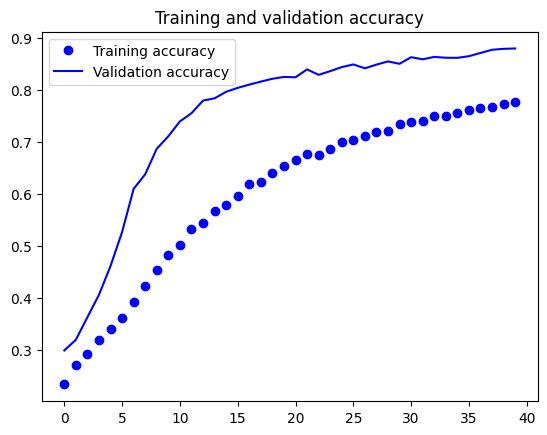

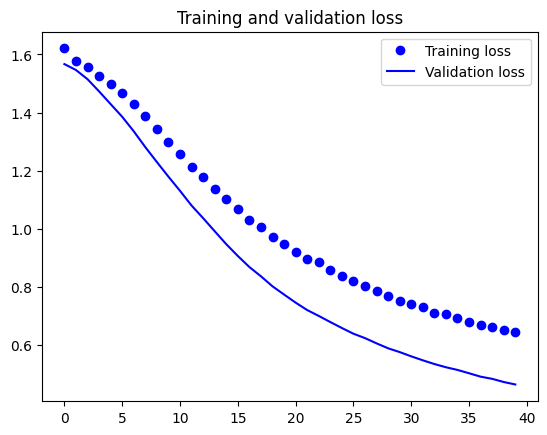

In [128]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [129]:
predicted_classes2 = flower_model.predict(test_X)

222/222 [==============================] - 0s 1ms/step


In [130]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [131]:
predicted_classes.shape, test_Y.shape

((7086,), (7086,))

# Aprendamos de los errores: Qué mejorar

Found 6314 correct labels


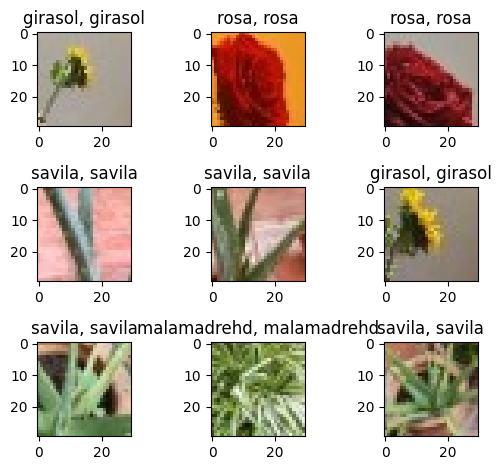

In [132]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]))

    plt.tight_layout()

Found 772 incorrect labels


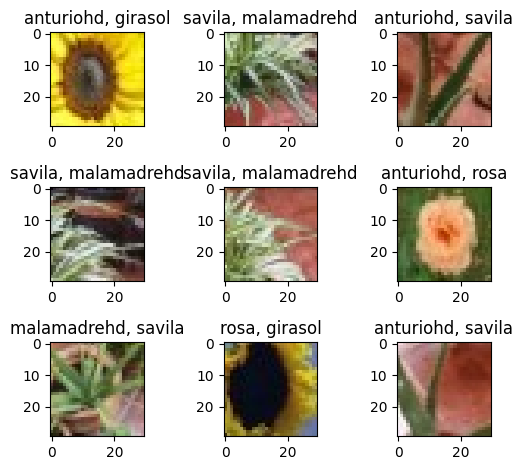

In [133]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(30,30,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]], flores[test_Y[incorrect]]))
    plt.tight_layout()

In [134]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.84      0.85       972
     Class 1       0.95      0.95      0.95      2003
     Class 2       0.81      0.89      0.84      1023
     Class 3       0.94      0.93      0.94      1737
     Class 4       0.82      0.79      0.81      1351

    accuracy                           0.89      7086
   macro avg       0.88      0.88      0.88      7086
weighted avg       0.89      0.89      0.89      7086



# Código para probar la CNN

In [135]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Carga del modelo
model = load_model('E:/ia/FloresCNN/cnn16/flores.h5py')

# Procesamiento de la imagen
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((30, 30))  # Asegúrate de ajustar el tamaño a 32x32 si es lo que estás usando ahora
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Ruta de las imagenes que deseas probar
dataTest = 'E:/ia/FloresCNN/img2'
imgs  = os.listdir(dataTest)

results = []

for img in imgs:
    imgpath = dataTest+'/'+img
    # Preprocesamiento de la imagen
    image = preprocess_image(imgpath)
    # Realizar predicciones
    predictions = model.predict(image)
    
    results.append([img, flores[np.argmax(predictions)]])

1/1 [==============================] - 0s 14ms/step


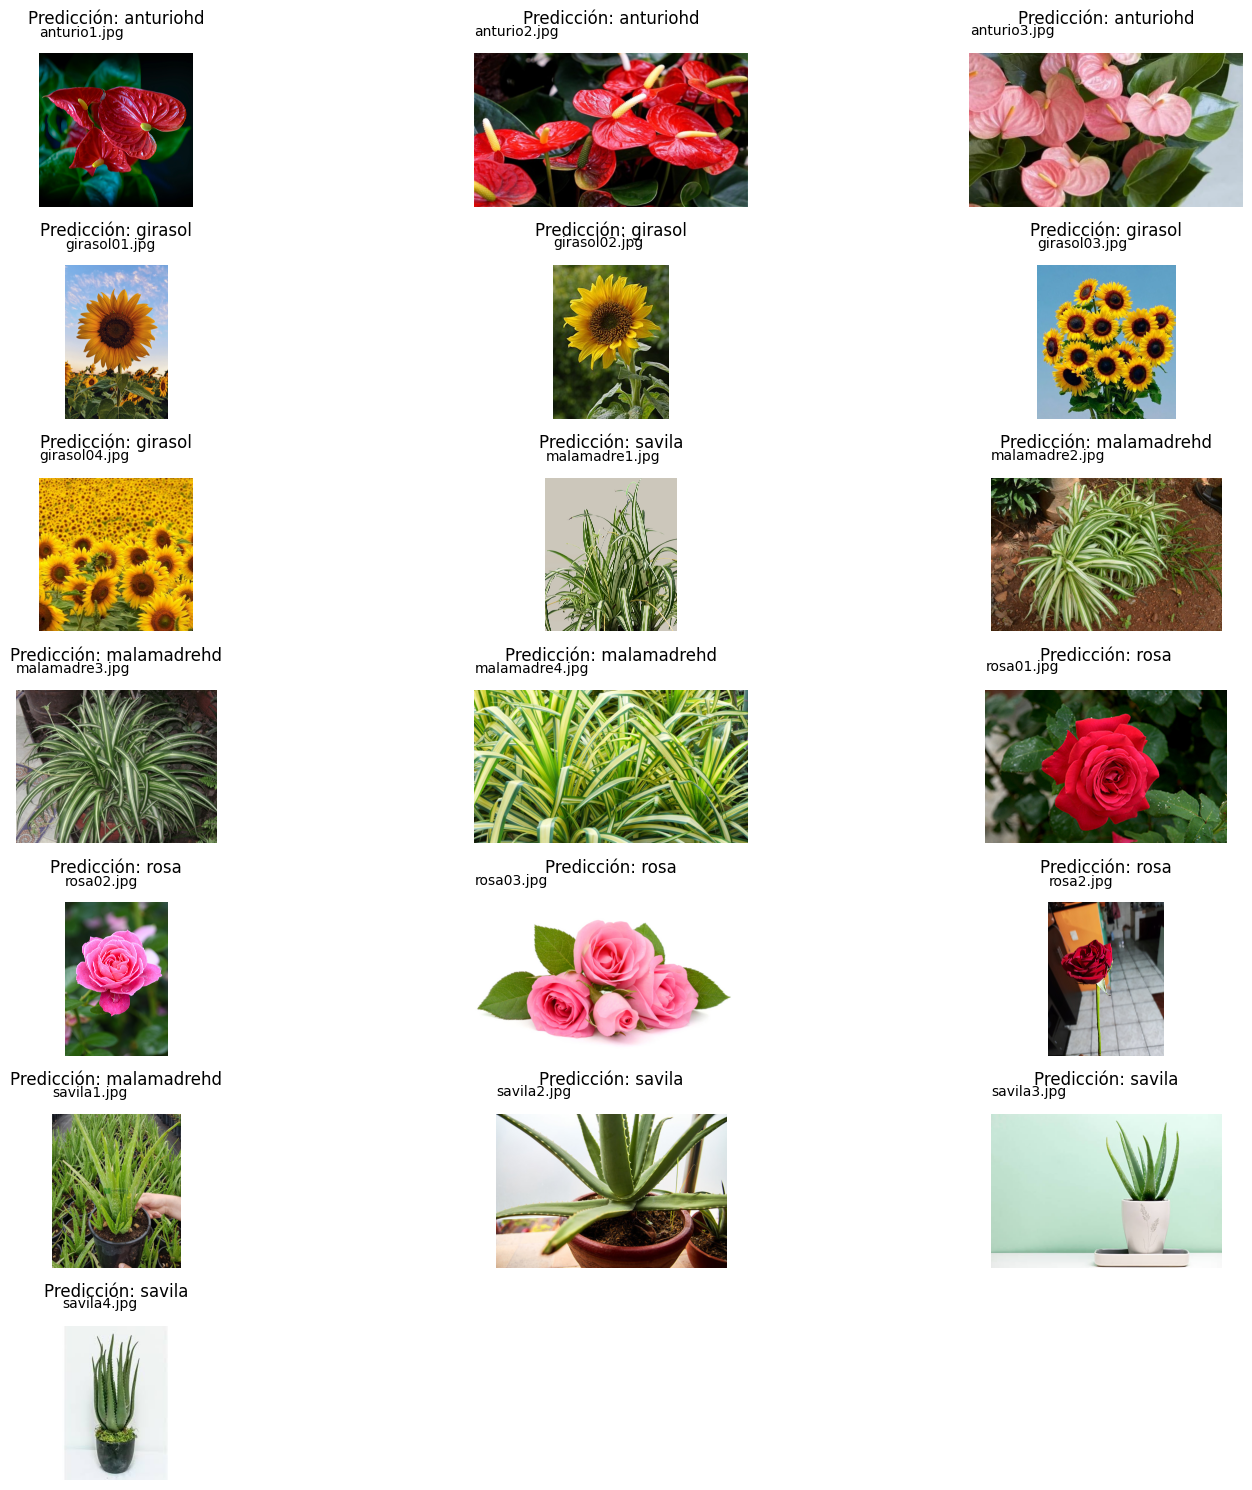

In [136]:
# Imprimir las predicciones (o hacer lo que quieras con ellas)
#print(tabulate(results, headers=["Imagen", "Categoria"], tablefmt="pretty"))

plt.figure(figsize=(15, 15))

num_images = len(results)

for i, result in enumerate(results):
    img_path = os.path.join(dataTest, result[0])
    img = Image.open(img_path)
    #img = img.resize((32, 32))  # Asegúrate de ajustar el tamaño a 32x32 si es lo que estás usando ahora
    plt.subplot((num_images // 3) + 1, 3, i + 1)
    plt.imshow(img)
    plt.title(f'Predicción: {result[1]}\n')
    plt.axis('off')
    plt.text(0, -5, result[0] + '\n', ha='left')

plt.tight_layout()
plt.show()